In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import NJODE.data_utils as data_utils

param_dict: {'epochs': [200], 'batch_size': [200], 'save_every': [5], 'learning_rate': [0.001], 'test_size': [0.2], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((50, 'tanh'), (50, 'tanh'))], 'readout_nn': [((50, 'tanh'), (50, 'tanh'))], 'enc_nn': [((50, 'tanh'), (50, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 'solver': ['euler'], 'weight': [0.5], 'weight_decay': [1.0], 'dataset': ['BlackScholes', 'Heston', 'OrnsteinUhlenbeck'], 'dataset_id': [None], 'plot': [True], 'evaluate': [True], 'paths_to_plot': [(0, 1, 2, 3, 4)]}
param_dict: {'epochs': [100], 'batch_size': [20], 'save_every': [10], 'learning_rate': [0.001], 'test_size': [0.2], 'training_size': [200, 400, 800, 1600, 3200, 6400, 12800], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((10, 'tanh'), (10, 'tanh'))], 'readout_nn': [((10, 'tanh'), (10, 'tanh'))], 'enc_nn': [((10, 'tanh'), (10, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 's

In [2]:
import NJODE.train as train

param_dict: {'epochs': [200], 'batch_size': [200], 'save_every': [5], 'learning_rate': [0.001], 'test_size': [0.2], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((50, 'tanh'), (50, 'tanh'))], 'readout_nn': [((50, 'tanh'), (50, 'tanh'))], 'enc_nn': [((50, 'tanh'), (50, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 'solver': ['euler'], 'weight': [0.5], 'weight_decay': [1.0], 'data_dict': ['poisson_pp_dict'], 'plot': [True], 'evaluate': [True], 'paths_to_plot': [(0, 1, 2, 3, 4)], 'saved_models_path': ['../data/saved_models_PPP/'], 'dataset_id': [1]}
param_dict: {'epochs': [200], 'batch_size': [200], 'save_every': [1], 'learning_rate': [0.001], 'test_size': [0.2], 'seed': [398], 'hidden_size': [10, 50], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((50, 'tanh'), (50, 'tanh'))], 'readout_nn': [((50, 'tanh'), (50, 'tanh'))], 'enc_nn': [((50, 'tanh'), (50, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 'solver': ['euler'], 'weight': [0.

In [3]:
dataset_dic = {
    'volatility': np.array([[1, 0, 0], [0, 1.5, 0], [0,0, 2]]).tolist(),
    'mean': np.array([22, 20, 25]).tolist(),
    'speed': np.array([[0.3, 0.0, 0.0], [0.0, 0.4, 0.0],[0.0,0.0,0.5]]).tolist(),
    'nb_paths': 1000,
    'nb_steps': 100,
    'S0': np.array([20, 17 ,20]).tolist(),
    'maturity': 1.0,
    'dimension': 3,
    'obs_perc': 1.0,
    'scheme': 'euler',
    'model_name': 'OrnsteinUhlenbeckForZ',
    'dt': 0.01
}

In [4]:
datasetpath, dataset_id = data_utils.create_dataset("OrnsteinUhlenbeckForZ",dataset_dic)

In [ ]:
train.train(dataset="OrnsteinUhlenbeckForZ", dataset_id=dataset_id, use_cond_exp=False, eval_use_true_paths=True, plot=True,  which_loss = 'easy_vol')

In [3]:
dataset_dic_mu = {
    'volatility': np.array([[0.2, 0.1, 0.1], [0.1, 0.25, 0.1], [0.1, 0.1, 0.3]]).tolist(),
    'mean': np.array([1.2, 1.0, 1.5]).tolist(),
    'speed': np.array([[0.3, 0.0, 0.0], [0.0, 0.3, 0.0], [0.0, 0.0, 0.3]]).tolist(),
    'nb_paths': 1000,
    'nb_steps': 100,
    'S0': np.array([1.0, 1.5, 2.0]).tolist(),
    'maturity': 1.0,
    'dimension': 3,
    'obs_perc': 1.0,
    'scheme': 'euler',
    'model_name': 'OrnsteinUhlenbeckMultiDimensional',
    'dt': 0.01
}

In [4]:
datasetpath_mu, dataset_id_mu = data_utils.create_dataset("OrnsteinUhlenbeckMultiDimensional",dataset_dic_mu)

In [58]:
import NJODE.train as train

In [ ]:
train.train(dataset="OrnsteinUhlenbeckMultiDimensional", dataset_id=46, use_cond_exp=True,plot=False, which_loss ='easy')

In [134]:
params_dict_mu = {
    'input_size': 3,
    'hidden_size': 10,
    'output_size': 3,
    'ode_nn': ((50, "tanh"), (50, "tanh")),
    'readout_nn': ((50, "tanh"), (50, "tanh")),
    'enc_nn': ((50, "tanh"), (50, "tanh")),
    'use_rnn': False,
    'options': {'which_loss': 'easy'},
    "input_coords": np.arange(3),
    "output_coords": np.arange(3)
}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from models_1 import get_ckpt_model, NJODE
model_mu = NJODE(**params_dict_mu).to(device)
optimizer = torch.optim.Adam(model_mu.parameters())
get_ckpt_model("../data/saved_models/id-51/last_checkpoint/", model_mu, optimizer, device)
model_mu.eval()

using loss: easy
neuralODE use input scaling with tanh
use residual network: input_size=3, output_size=10
use residual network: input_size=10, output_size=3


NJODE(
  (ode_f): ODEFunc(
    (f): Sequential(
      (0): Linear(in_features=15, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (encoder_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=3, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (readout_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=10, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
 

In [135]:
params_dict_vol = {
    'input_size': 9,
    'hidden_size': 10,
    'output_size': 9,
    'ode_nn': ((50, "tanh"), (50, "tanh")),
    'readout_nn': ((50, "tanh"), (50, "tanh")),
    'enc_nn': ((50, "tanh"), (50, "tanh")),
    'use_rnn': False,
    'options': {'which_loss': 'easy_vol'},
    "input_coords": np.arange(9),
    "output_coords": np.arange(9)
}
model_vol = NJODE(**params_dict_vol).to(device)
optimizer_vol = torch.optim.Adam(model_vol.parameters())
get_ckpt_model("../data/saved_models/id-52/last_checkpoint/", model_vol, optimizer_vol, device)
model_vol.eval()

using loss: easy_vol
neuralODE use input scaling with tanh
use residual network: input_size=9, output_size=10
use residual network: input_size=10, output_size=9


NJODE(
  (ode_f): ODEFunc(
    (f): Sequential(
      (0): Linear(in_features=21, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (encoder_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=9, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (readout_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=10, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
 

In [4]:
mu_data=np.load("../data/training_data/OrnsteinUhlenbeckMultiDimensional-46/data.npy")

In [5]:
vol_data=np.load("../data/training_data/OrnsteinUhlenbeckForZ-45/data.npy")

In [73]:
 def generate_next_value( X_t, mu_t, sigma_t, delta_t):
    """
    Generate the next value in the time series using the Euler-Maruyama scheme.

    :param X_t: current value tensor of shape (batch_size, d)
    :param mu_t: drift coefficient tensor of shape (batch_size, d)
    :param sigma_t: diffusion coefficient tensor of shape ( d, d)
    :param delta_t: time difference float
    :return: next value tensor of shape (batch_size, d)
    """
    delta_Wt = torch.randn_like(X_t) * delta_t** 0.5

    X_t_next = X_t + mu_t * delta_t + delta_Wt @ sigma_t

    return X_t_next

In [138]:
times=np.array([0.01,])
time_ptr = np.array([0, 1])
obs_idx = torch.tensor([0],dtype=torch.long)
Vol = torch.tensor([],dtype=torch.float)
delta_t=0.01
T=1
X= torch.tensor(mu_data[0,:,0], dtype=torch.float).unsqueeze(0)
start_X = torch.tensor(mu_data[0,:,0], dtype=torch.float).unsqueeze(0)
n_obs_ot=torch.tensor([1], dtype=torch.float) 
mu_hat = []
sigma_hat = []
for i in range(2,3):
    times=np.append(times, 0.01*i)
    time_ptr = np.append(time_ptr, i) 
    obs_idx=torch.cat((obs_idx, torch.tensor([0], dtype=torch.long)))
    n_obs_ot+=1
    X= torch.cat((X, torch.tensor(mu_data[0,:,i-1], dtype=torch.float).unsqueeze(0))) 
    mu_pred=model_mu.get_pred1(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"][-1]
    X_t_plus = X[i-1,:].unsqueeze(0)
    X_t = X[i-2, :].unsqueeze(0) 
    vol_tensor = (X_t_plus - X_t).T@(X_t_plus-X_t) 
    vol  = vol_tensor.view(1,-1)
    Vol = torch.cat((Vol, vol))
    sigma_pred=model_vol.get_pred1(times[:-1], time_ptr[:-1], Vol, obs_idx[:-1], delta_t, T, vol, (n_obs_ot-1) )["pred"][-1]
    mu_t = (mu_pred - X_t)/delta_t
    sigma_t = sigma_pred/(delta_t**0.5)
    X_next = generate_next_value(X_t, mu_t, sigma_t.view(3,3), delta_t) 
    X[i-1,:] = X_next 
    mu_hat.append(mu_t) 
    sigma_hat.append(sigma_t) 

In [139]:
X

tensor([[1.0000, 1.5000, 2.0000],
        [1.3214, 1.9327, 2.2821]], grad_fn=<CopySlices>)

In [123]:
model_mu.get_pred1(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)


{'pred': tensor([[[1.0001, 1.5001, 2.0001]],
 
         [[1.0001, 1.5001, 2.0001]],
 
         [[1.0061, 1.4748, 2.0142]]], grad_fn=<SliceBackward0>),
 'pred_t': array([0.  , 0.01, 0.02]),
 'loss': tensor(0.0004, grad_fn=<AddBackward0>)}

In [124]:
model_mu.get_pred1(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)

{'pred': tensor([[[1.0001, 1.5001, 2.0001]],
 
         [[1.0001, 1.5001, 2.0001]],
 
         [[1.0061, 1.4748, 2.0142]]], grad_fn=<SliceBackward0>),
 'pred_t': array([0.  , 0.01, 0.02]),
 'loss': tensor(0.0004, grad_fn=<AddBackward0>)}

In [120]:
mu_data[0,:,:]

array([[1.        , 1.04967   , 1.10384165, 1.12058614, 1.14501952,
        1.1660606 , 1.18572511, 1.15795843, 1.17237964, 1.20377152,
        1.23003791, 1.22795051, 1.1863351 , 1.21913244, 1.18834328,
        1.16866408, 1.15524355, 1.11201779, 1.10310542, 1.10778095,
        1.10413641, 1.0792478 , 1.04284085, 1.0062632 , 1.01646406,
        1.03147784, 1.00379073, 0.98705846, 0.99500801, 1.05613471,
        1.0528048 , 1.05949005, 1.09007376, 1.10974136, 1.12340584,
        1.09618866, 1.12376178, 1.19593007, 1.22455157, 1.23661493,
        1.24876774, 1.24813832, 1.2660796 , 1.28239388, 1.28798926,
        1.26819849, 1.28520548, 1.2670268 , 1.28363061, 1.33135918,
        1.33553051, 1.34344497, 1.31886655, 1.31876867, 1.32397096,
        1.33120862, 1.32225239, 1.35802424, 1.36598277, 1.34358182,
        1.32497954, 1.29733903, 1.24281069, 1.21372061, 1.23428168,
        1.22694501, 1.23938619, 1.29220621, 1.30469125, 1.30076698,
        1.2875218 , 1.31649828, 1.29327544, 1.31

In [115]:
mu_hat

[tensor([[4.9742, 3.5532, 4.8593]], grad_fn=<DivBackward0>),
 tensor([[4.1061, 5.2464, 1.4217]], grad_fn=<DivBackward0>),
 tensor([[-0.3697, -3.4751, -0.8072]], grad_fn=<DivBackward0>),
 tensor([[2.6534, 2.5475, 3.6168]], grad_fn=<DivBackward0>),
 tensor([[2.9026, 2.5747, 3.0241]], grad_fn=<DivBackward0>),
 tensor([[ 2.3940,  2.4728, -1.2472]], grad_fn=<DivBackward0>),
 tensor([[ -7.9122,  -6.0043, -12.8931]], grad_fn=<DivBackward0>),
 tensor([[0.6320, 4.5869, 0.4055]], grad_fn=<DivBackward0>),
 tensor([[ 2.1470, -3.4459, -0.5653]], grad_fn=<DivBackward0>),
 tensor([[0.2348, 6.0380, 3.2596]], grad_fn=<DivBackward0>),
 tensor([[2.1632, 0.9142, 2.3128]], grad_fn=<DivBackward0>),
 tensor([[-0.5983, -1.3779,  1.8807]], grad_fn=<DivBackward0>),
 tensor([[3.0787, 7.4437, 1.1823]], grad_fn=<DivBackward0>),
 tensor([[-2.1108, -2.5882, -6.8437]], grad_fn=<DivBackward0>),
 tensor([[-2.0977,  2.1133, -4.4062]], grad_fn=<DivBackward0>),
 tensor([[-0.6061, -1.5753,  3.8054]], grad_fn=<DivBackward0>

In [116]:
sigma_hat

[tensor([[0.2240, 0.1167, 0.1204, 0.1179, 0.2597, 0.1145, 0.1233, 0.1160, 0.3171]],
        grad_fn=<DivBackward0>),
 tensor([[0.2161, 0.1206, 0.1021, 0.1217, 0.2745, 0.1047, 0.1050, 0.1062, 0.2956]],
        grad_fn=<DivBackward0>),
 tensor([[0.1994, 0.1004, 0.0966, 0.1016, 0.2593, 0.1001, 0.0995, 0.1017, 0.2943]],
        grad_fn=<DivBackward0>),
 tensor([[0.2063, 0.1058, 0.1058, 0.1070, 0.2535, 0.1064, 0.1088, 0.1080, 0.3066]],
        grad_fn=<DivBackward0>),
 tensor([[0.2077, 0.1065, 0.1050, 0.1077, 0.2537, 0.1050, 0.1079, 0.1066, 0.3027]],
        grad_fn=<DivBackward0>),
 tensor([[0.2050, 0.1050, 0.0933, 0.1062, 0.2532, 0.0942, 0.0962, 0.0957, 0.2952]],
        grad_fn=<DivBackward0>),
 tensor([[0.2620, 0.1467, 0.1984, 0.1479, 0.2833, 0.1749, 0.2014, 0.1764, 0.4601]],
        grad_fn=<DivBackward0>),
 tensor([[0.1997, 0.1020, 0.0965, 0.1031, 0.2681, 0.0991, 0.0995, 0.1007, 0.2938]],
        grad_fn=<DivBackward0>),
 tensor([[0.2039, 0.0917, 0.0950, 0.0929, 0.2591, 0.0993, 0.0980

In [105]:
sigma_pred

tensor([[0.0224, 0.0117, 0.0120, 0.0118, 0.0260, 0.0114, 0.0123, 0.0116, 0.0317]],
       grad_fn=<SelectBackward0>)

In [106]:
sigma_pred.reshape(3,3)

tensor([[0.0224, 0.0117, 0.0120],
        [0.0118, 0.0260, 0.0114],
        [0.0123, 0.0116, 0.0317]], grad_fn=<ViewBackward0>)

In [107]:
vol_tensor

tensor([[0.0025, 0.0018, 0.0024],
        [0.0018, 0.0013, 0.0017],
        [0.0024, 0.0017, 0.0024]])

In [78]:
Y=sigma_pred.reshape(3,3)

In [79]:
start_vol = torch.tensor(vol_data[0,:,0], dtype=torch.float).unsqueeze(0)

In [80]:
start_vol

tensor([[0.0025, 0.0018, 0.0024, 0.0018, 0.0013, 0.0017, 0.0024, 0.0017, 0.0024]])

In [81]:
start_vol.reshape(3,3)

tensor([[0.0025, 0.0018, 0.0024],
        [0.0018, 0.0013, 0.0017],
        [0.0024, 0.0017, 0.0024]])

In [82]:
Z=start_vol.reshape(3,3)

In [83]:
Y.T@Y

tensor([[0.0008, 0.0007, 0.0008],
        [0.0007, 0.0009, 0.0008],
        [0.0008, 0.0008, 0.0013]], grad_fn=<MmBackward0>)

In [84]:
(Y.T@Y).view(1,-1)

tensor([[0.0008, 0.0007, 0.0008, 0.0007, 0.0009, 0.0008, 0.0008, 0.0008, 0.0013]],
       grad_fn=<ViewBackward0>)

In [85]:
torch.sum(((Y.T@Y).view(1,-1) - start_vol)**2)

tensor(1.3125e-05, grad_fn=<SumBackward0>)

In [100]:
times=np.array([])
time_ptr = np.array([0])
obs_idx = torch.tensor([],dtype=torch.long)
delta_t=0.01
T=1
Vol = torch.tensor([],dtype=torch.float)
X= torch.tensor(mu_data[0,:,0], dtype=torch.float).unsqueeze(0)
start_X = torch.tensor(mu_data[0,:,0], dtype=torch.float).unsqueeze(0)
n_obs_ot=torch.tensor([0], dtype=torch.float)
mu_hat = []
sigma_hat = []
for i in range(1,101):
    times=np.append(times, 0.01*i)
    time_ptr = np.append(time_ptr, i)
    obs_idx=torch.cat((obs_idx, torch.tensor([0], dtype=torch.long)))
    n_obs_ot+=1
    X= torch.cat((X, torch.tensor(mu_data[0,:,i], dtype=torch.float).unsqueeze(0)))
    mu_pred=model_mu.get_pred1(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"][-1]
    X_t_plus = X[i,:].unsqueeze(0)
    X_t = X[i-1, :].unsqueeze(0)
    vol_tensor = (X_t_plus - X_t).T@(X_t_plus-X_t)
    vol  = vol_tensor.view(1,-1)
    Vol = torch.cat((Vol, vol))
    sigma_pred=model_vol.get_pred1(np.array([]), np.array([0]), Vol,torch.tensor([],dtype=torch.long), delta_t, T, vol, n_obs_ot=torch.tensor([0], dtype=torch.float))["pred"][-1]
    mu_t = (mu_pred - X_t)/delta_t
    sigma_t = sigma_pred/delta_t
    X_next = generate_next_value(X_t, mu_t, sigma_t.view(3,3), delta_t)
    X[i,:] = X_next
    mu_hat.append(mu_t)
    sigma_hat.append(sigma_t)

In [101]:
X

tensor([[ 1.0000e+00,  1.5000e+00,  2.0000e+00],
        [ 6.9919e-01,  1.2641e+00,  1.7566e+00],
        [ 3.2176e-01,  8.9698e-01,  1.4586e+00],
        [ 8.6360e-01,  1.4841e+00,  2.5041e+00],
        [ 8.9379e-01,  1.5562e+00,  2.8851e+00],
        [ 2.4258e+00,  2.1070e+00, -3.1643e-01],
        [-6.8492e+00, -1.1295e+00,  1.7712e+01],
        [-6.1173e+01, -1.9853e+01,  1.2425e+02],
        [ 1.2508e+03,  4.3208e+02, -2.4476e+03],
        [ 7.4354e+07,  2.5614e+07, -1.4576e+08],
        [ 2.2856e+17,  7.8739e+16, -4.4808e+17],
        [ 1.3113e+36,  4.5175e+35, -2.5708e+36],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan

In [14]:
vol_data=np.load("../data/training_data/OrnsteinUhlenbeckForZ-44/data.npy")

In [15]:
stock_paths_1, observed_dates_1, nb_obs_1, hyperparam_dict_1, obs_noise_1 = data_utils.load_dataset("OrnsteinUhlenbeckForZ", 44)
stock_paths_2, observed_dates_2, nb_obs_2, hyperparam_dict_2, obs_noise_2 = data_utils.load_dataset("OrnsteinUhlenbeckMultiDimensional", 46)

In [16]:
delta_t=0.01
T=1

In [17]:
def input_data(stock_paths, observed_dates, nb_obs, i):
    times = [0.01]
    time_ptr = [0, 1]
    obs_idx = []
    current_time = 0.
    counter = 0
    for t in range(1, observed_dates.shape[-1]):
        current_time += 0.01
        if observed_dates[0, t].sum() > 0:
            times.append(current_time)
            if observed_dates[0, t] == 1:
                counter += 1
                obs_idx.append(0)
        time_ptr.append(counter)
    obs_idx=torch.tensor(obs_idx, dtype=torch.long)
    X=torch.tensor(stock_paths[i,:,:].T, dtype=torch.float)
    start_X=torch.tensor(stock_paths[i,:,0], dtype=torch.float).reshape(1,stock_paths.shape[1])
    n_obs_ot=torch.tensor(nb_obs[i],dtype=torch.float).unsqueeze(0)
    return np.array(times), np.array(time_ptr), X, obs_idx, delta_t, T, start_X, n_obs_ot

In [18]:
times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot = input_data(stock_paths_1, observed_dates_1, nb_obs_1, 0)
vol_pred=model_vol.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X,n_obs_ot)

In [19]:
input_data=torch.tensor(vol_data[0,:,:].T, dtype=torch.float) 


In [20]:
output_data=vol_pred["pred"].squeeze(1)

In [21]:
input_data

tensor([[ 2.4671e-03,  1.7599e-03,  2.4092e-03,  1.7599e-03,  1.2554e-03,
          1.7186e-03,  2.4092e-03,  1.7186e-03,  2.3527e-03],
        [ 2.9346e-03,  3.0977e-03,  4.8883e-04,  3.0977e-03,  3.2699e-03,
          5.1600e-04,  4.8883e-04,  5.1600e-04,  8.1426e-05],
        [ 2.8038e-04,  3.8752e-05,  3.5215e-05,  3.8752e-05,  5.3560e-06,
          4.8672e-06,  3.5215e-05,  4.8672e-06,  4.4231e-06],
        [ 5.9699e-04,  4.8549e-04,  1.1331e-03,  4.8549e-04,  3.9482e-04,
          9.2150e-04,  1.1331e-03,  9.2150e-04,  2.1508e-03],
        [ 4.4273e-04,  2.6578e-04,  4.0216e-04,  2.6578e-04,  1.5956e-04,
          2.4143e-04,  4.0216e-04,  2.4143e-04,  3.6531e-04],
        [ 3.8669e-04,  7.1043e-04,  1.7693e-04,  7.1043e-04,  1.3052e-03,
          3.2504e-04,  1.7693e-04,  3.2504e-04,  8.0949e-05],
        [ 7.7099e-04,  1.2885e-03,  2.3649e-03,  1.2885e-03,  2.1535e-03,
          3.9524e-03,  2.3649e-03,  3.9524e-03,  7.2540e-03],
        [ 2.0797e-04,  2.6329e-04, -1.4175e-04, 

In [22]:
output_data

tensor([[0.0224, 0.0117, 0.0120, 0.0118, 0.0260, 0.0114, 0.0123, 0.0116, 0.0317],
        [0.0224, 0.0117, 0.0120, 0.0118, 0.0260, 0.0114, 0.0123, 0.0116, 0.0317],
        [0.0224, 0.0117, 0.0120, 0.0118, 0.0260, 0.0114, 0.0123, 0.0116, 0.0317],
        [0.0229, 0.0130, 0.0101, 0.0131, 0.0280, 0.0102, 0.0104, 0.0104, 0.0294],
        [0.0202, 0.0099, 0.0097, 0.0101, 0.0247, 0.0097, 0.0100, 0.0099, 0.0294],
        [0.0205, 0.0104, 0.0108, 0.0105, 0.0251, 0.0106, 0.0111, 0.0108, 0.0315],
        [0.0204, 0.0102, 0.0100, 0.0103, 0.0249, 0.0100, 0.0103, 0.0101, 0.0297],
        [0.0203, 0.0106, 0.0098, 0.0107, 0.0260, 0.0101, 0.0101, 0.0102, 0.0294],
        [0.0207, 0.0112, 0.0120, 0.0113, 0.0269, 0.0137, 0.0123, 0.0138, 0.0366],
        [0.0201, 0.0102, 0.0095, 0.0103, 0.0250, 0.0095, 0.0098, 0.0097, 0.0295],
        [0.0209, 0.0094, 0.0098, 0.0095, 0.0250, 0.0096, 0.0101, 0.0098, 0.0294],
        [0.0206, 0.0112, 0.0111, 0.0113, 0.0271, 0.0124, 0.0114, 0.0126, 0.0324],
        [0.0199,

In [8]:
times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot = input_data(stock_paths_2, observed_dates_2, nb_obs_2, 0)
mu_pred=model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"]

In [18]:
times=[]
time_ptr = [0]
obs_idx = torch.tensor([],dtype=torch.long)
delta_t=0.01
T=0.01
X= torch.tensor(mu_data[0,:,1], dtype=torch.float).reshape(1,3)
start_X = torch.tensor(mu_data[0,:,0], dtype=torch.float).reshape(1,3) 
Vol = torch.tensor(vol_data[0,:,0], dtype=torch.float).reshape(1,9)

start_vol = torch.tensor(vol_data[0,:,0], dtype=torch.float).reshape(1,9)
n_obs_ot=torch.tensor([0])
counts = 0
current_time=0
for i in range(2):
    mu=model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"][-1,:,:]
    mu_hat=(mu-start_X)/delta_t
    print(mu_hat)
    sigma_hat=model_vol.get_pred(times, time_ptr, Vol, obs_idx, delta_t, T, start_vol, n_obs_ot)["pred"][-1,:,:]
    print(sigma_hat)
    #X_next=generate_next_value(X[-1,:].reshape(1,3),mu_hat,vol_pred[2*i,:,:].reshape(3,3),delta_t)
    #Vol_next = (( X_next - X[-1,:]).T@( X_next - X[-1,:])).reshape(1,9)
    current_time+=delta_t
    T+=delta_t
    times=np.append(times,current_time)
    time_ptr=np.append(time_ptr, len(obs_idx)+1)
    obs_idx=torch.cat((obs_idx, torch.arange(start_X.shape[0], dtype=torch.long)))
    #X=torch.cat((X,X_next))
    #Vol=torch.cat((Vol, Vol_next))
    n_obs_ot+=1

tensor([[ 0.0223, -0.0266, -0.0946]], grad_fn=<DivBackward0>)
tensor([[0.0025, 0.0018, 0.0021, 0.0018, 0.0013, 0.0017, 0.0024, 0.0017, 0.0024]],
       grad_fn=<SliceBackward0>)
tensor([[4.9891, 3.5163, 4.7556]], grad_fn=<DivBackward0>)
tensor([[0.0025, 0.0018, 0.0021, 0.0018, 0.0013, 0.0017, 0.0024, 0.0017, 0.0024]],
       grad_fn=<SliceBackward0>)


In [ ]:
times=[]
time_ptr = [0]
obs_idx = torch.tensor([],dtype=torch.long)
delta_t=0.01
T=0.01
X= torch.tensor([[1.0], [1.5], [2.0]]).reshape(1,3)
start_X = torch.tensor([[1.0], [1.5], [2.0]]).reshape(1,3)
Vol = torch.tensor(vol_data[0,:,0], dtype=torch.float).unsqueeze(0)
start_vol = torch.tensor(vol_data[0,:,0], dtype=torch.float).unsqueeze(0)
n_obs_ot=torch.tensor([0])
counts = 0
current_time=0
for i in range(100):
    mu=model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"][-1,:,:] 
    mu_hat = (mu - X[-1,:].reshape(1,3))/delta_t 
    X_next=generate_next_value(X[-1,:].reshape(1,3),mu_hat,vol_pred[i,:,:].reshape(3,3),delta_t)
    Vol_next = (( X_next - X[-1,:]).T@( X_next - X[-1,:])).reshape(1,9)
    current_time+=delta_t
    T+=delta_t
    times=np.append(times,current_time)
    time_ptr=np.append(time_ptr, len(obs_idx)+1)
    obs_idx=torch.cat((obs_idx, torch.arange(start_X.shape[0], dtype=torch.long)))
    X=torch.cat((X,X_next)) 
    Vol=torch.cat((Vol, Vol_next))
    n_obs_ot+=1

In [58]:
stock_paths_1, observed_dates_1, nb_obs_1, hyperparam_dict_1, obs_noise_1 = data_utils.load_dataset("OrnsteinUhlenbeckForZ", 45)
stock_paths_2, observed_dates_2, nb_obs_2, hyperparam_dict_2, obs_noise_2 = data_utils.load_dataset("OrnsteinUhlenbeckMultiDimensional", 46)

In [55]:
def input_data(stock_paths, observed_dates, nb_obs, i):
    times = []
    time_ptr = [0]
    obs_idx = []
    current_time = 0.
    counter = 0
    for t in range(1, observed_dates.shape[-1]):
        current_time += 0.01
        if observed_dates[0, t].sum() > 0:
            times.append(current_time)
            if observed_dates[0, t] == 1:
                counter += 1
                obs_idx.append(0)
        time_ptr.append(counter) 
    obs_idx=torch.tensor(obs_idx, dtype=torch.long)
    X=torch.tensor(stock_paths[i,:,:].T, dtype=torch.float)
    start_X=torch.tensor(stock_paths[i,:,0], dtype=torch.float).reshape(1,stock_paths.shape[1])
    n_obs_ot=torch.tensor(nb_obs[i],dtype=torch.float).unsqueeze(0) 
    return np.array(times), np.array(time_ptr), X, obs_idx, delta_t, T, start_X, n_obs_ot

In [56]:
def get_mu_hat(mu_pred, X, delta_t):
    mu_pred=mu_pred.squeeze(1)
    return (mu_pred-X)/delta_t

In [57]:
def generate_path(X, mu_hat, vol_pred):
    X_generated = X[0,:].unsqueeze(0)
    for i in range(100):
        if i==0:
            X_next=generate_next_value(X[i,:],mu_hat[i,:].view(1,3),vol_pred[i,:,:].view(3,3),0.01)
        else:
            X_next=generate_next_value(X_next,mu_hat[i,:].view(1,3),vol_pred[i,:,:].view(3,3),0.01)
        X_generated=torch.cat((X_generated,X_next))
    return X_generated 

In [64]:
from scipy.stats import linregress
def estimate_ou_parameters(paths, delta_t):
    """
    Estimate the parameters of an OU process from given paths.
    
    Parameters:
    - paths: numpy array of shape (num_paths, num_timesteps)
    - delta_t: time increment between observations
    
    Returns:
    - theta: rate of mean reversion
    - mu: long-term mean
    - sigma: volatility
    """
    num_paths, num_timesteps = paths.shape
         


    X_t = paths[:, :-1].flatten()
    X_t_plus_1 = paths[:, 1:].flatten()

    b, a, _, _, _ = linregress(X_t,X_t_plus_1)

    kappa_OLS = -np.log(b)/delta_t
    theta_OLS = a/(1-b)

    res=X_t_plus_1-b*X_t-a
    std_resid =np.std(res, ddof=2)

    sig_OLS = std_resid*np.sqrt(2*kappa_OLS/(1-b**2))

    return np.mean(kappa_OLS), np.mean(theta_OLS), np.mean(sig_OLS) 

"""
    X_t = paths[:, :-1]
    X_t_plus_1 = paths[:, 1:] 
    
    beta = np.empty(num_paths)
    alpha = np.empty(num_paths)
    kappa_OLS = np.empty(num_paths)
    theta_OLS = np.empty(num_paths)
    sig_OLS = np.empty(num_paths)
    
    for i in range(num_paths):
        b, a, _, _, _ = linregress(X_t[i],X_t_plus_1[i])
        beta[i] = b
        alpha[i] = a 
        
        kappa_OLS[i] = -np.log(b)/delta_t
        theta_OLS[i] = a/(1-b)
    
        res=X_t_plus_1[i]-b*X_t[i]-a
        std_resid =np.std(res, ddof=2)
    
        sig_OLS[i] = std_resid*np.sqrt(2*kappa_OLS[i]/(1-b**2))

    return np.mean(theta_OLS), np.mean(kappa_OLS), np.mean(sig_OLS)
""" 

In [13]:
delta_t=0.01
T=1

In [125]:
generated_paths=[]
for i in range(20):
    times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot = input_data(stock_paths_1, observed_dates_1, nb_obs_1, i)
    vol_pred=model_vol.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X,n_obs_ot)["pred"]
    times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot = input_data(stock_paths_2, observed_dates_2, nb_obs_2, i)
    mu_pred=model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"]
    mu_hat=get_mu_hat(mu_pred,X,delta_t)
    generated_paths.append(generate_path(X,mu_hat,vol_pred))
    
generated_paths=torch.stack(generated_paths)    

In [127]:
real_paths=[]
for i in range(10000):
    real_paths.append(torch.tensor(mu_data[i,:,:].T,dtype=torch.float)  )
real_paths=torch.stack(real_paths)

In [70]:
for i in range(3):
    speed_1, mean_1, volatility_1 = estimate_ou_parameters(real_paths[:,:,i].detach().numpy(),0.01)
    speed_2, mean_2, volatility_2 = estimate_ou_parameters(generated_paths[:,:,i].detach().numpy(),0.01)
    print( f"Dimension {i+1}" )
    print( f" Data parameters: speed = {speed_1:.3f}, mean = {mean_1:.3f}, volatility = {volatility_1:.3f}"  )
    print( f" Generated data parameters: speed = {speed_2:.3f}, mean = {mean_2:.3f}, volatility = {volatility_2:.3f}"  )

Dimension 1
 Data parameters: speed = 0.328, mean = 1.187, volatility = 0.245
 Generated data parameters: speed = 0.563, mean = 0.994, volatility = 0.242
Dimension 2
 Data parameters: speed = 0.422, mean = 1.027, volatility = 0.288
 Generated data parameters: speed = 0.228, mean = 2.516, volatility = 0.286
Dimension 3
 Data parameters: speed = 0.508, mean = 1.507, volatility = 0.332
 Generated data parameters: speed = 0.682, mean = 2.539, volatility = 0.331


ValueError: x and y can be no greater than 2D, but have shapes (101,) and (101, 1, 20)

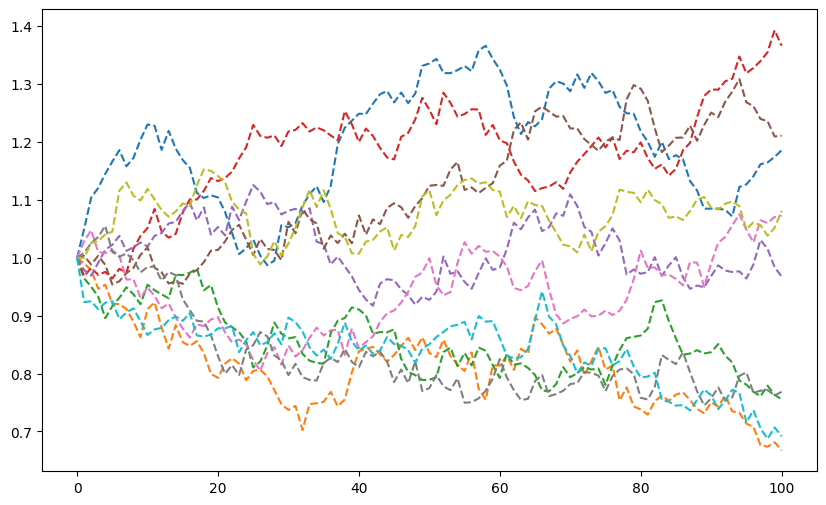

In [128]:
real_path = real_paths[:,:,0].T
generated_path = generated_paths[:,:,0].T

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(real_path[:,i], label=f'real_path{i}', linestyle="--")

plt.plot(generated_path.unsqueeze(1).detach().numpy(), label='generated_path')
plt.legend()
plt.show() 